<a href="https://colab.research.google.com/github/godwins3/ml-playground/blob/main/my_tutorials/simple_linear_regression_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple Linear Regression Tutorial

URL: https://towardsai.net/p/machine-learning/calculating-simple-linear-regression-and-linear-best-fit-an-in-depth-tutorial-with-math-and-python-804a0cb23660



## Simple Linear Regression from Scratch Implementation

In [ ]:
!wget https://raw.githubusercontent.com/towardsai/tutorials/master/simple_linear_regression_tutorial/Fuel_Consumption.csv

--2020-10-06 04:15:16--  https://raw.githubusercontent.com/towardsai/tutorials/master/simple_linear_regression_tutorial/Fuel_Consumption.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/plain]
Saving to: ‘Fuel_Consumption.csv’

Fuel_Consumption.cs 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2020-10-06 04:15:17 (4.11 MB/s) - ‘Fuel_Consumption.csv’ saved [72629/72629]



In [ ]:
#Import the required libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Read the csv file:

data = pd.read_csv("Fuel_Consumption.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
#Columns in our dataset:

data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [ ]:
#Find datatype of each column and check if any entry is null or not:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
#Select only those features from our dataset which we are going to use for predictions:

data = data[["ENGINESIZE","CO2EMISSIONS"]]
print(data.head())

   ENGINESIZE  CO2EMISSIONS
0         2.0           196
1         2.4           221
2         1.5           136
3         3.5           255
4         3.5           244


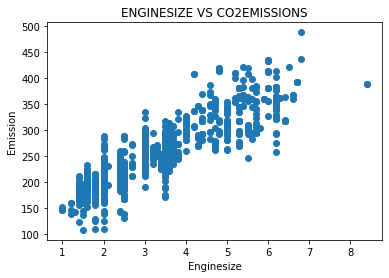

In [ ]:
#Scatter Plot:
#ENGINESIZE VS CO2EMISSIONS :

plt.scatter(data["ENGINESIZE"],data["CO2EMISSIONS"])
plt.title("ENGINESIZE VS CO2EMISSIONS")
plt.xlabel("Enginesize")
plt.ylabel("Emission")
plt.show()

In [ ]:
#Taking 80% of the data for training and 20% for testing:
num = int(len(data)*0.8)

#Training data:
train = data[:num]

#Testing data:
test = data[num:]

print ("Data: ",len(data))
print ("Train: ",len(train))
print ("Test: ",len(test))

Data:  1067
Train:  853
Test:  214


In [ ]:
#Main function to find the coefficients of line:

def simple_linear_regression(input_feature,output):

    Xi = input_feature
    Yi = output

    #Total number of data points:
    n = len(Xi)

    #X bar:
    Xi_mean = Xi.mean()

    #Y bar:
    Yi_mean = Yi.mean()

    #Sum of X:
    S_Xi = (Xi).sum()

    #Sum of Y:
    S_Yi = (Yi).sum()

    #Sum of (X*Y) multiplied by n:
    S_XiYi = ((Xi*Yi).sum())*n

    #Sum of X*Sum of Y:
    S_Xi_S_Yi = S_Xi*S_Yi

    #Sum of (X*X) multiplied by n:
    S_XiXi = ((Xi*Xi).sum())*n

    #Square of sum of X:
    S_Xi_Square = S_Xi*S_Xi

    #Slope:
    slope = (S_XiYi- S_Xi_S_Yi) / (S_XiXi-S_Xi_Square)

    #Intercept:
    intercept = Yi_mean - slope * Xi_mean

    return slope,intercept

In [ ]:
#Check the function with dummy data:

dummy_input = np.array((1,2,3,4,5))
dummy_output = np.array((1,2,3,4,5))

dummy_slope,dummy_intercept = simple_linear_regression(dummy_input,dummy_output)

print ("Slope : " , dummy_slope)
print ("Intercept :",dummy_intercept)

Slope :  1.0
Intercept : 0.0


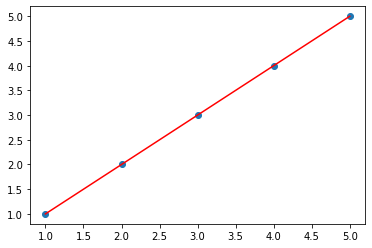

In [ ]:
#Graph for dummy data:

plt.scatter([1,2,3,4,5],[1,2,3,4,5])
plt.plot([1,2,3,4,5],[1,2,3,4,5],color="red")
plt.show()

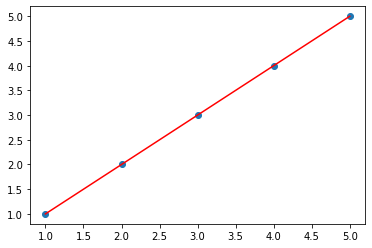

In [ ]:
#Graph for dummy data:

plt.scatter([1,2,3,4,5],[1,2,3,4,5])
plt.plot([1,2,3,4,5],[1,2,3,4,5],color="red")
plt.show()

In [ ]:
#Training the model with train data:
#Finding the coefficients of best fit line:

actual_slope,actual_intercept = simple_linear_regression(train["ENGINESIZE"],train["CO2EMISSIONS"])

print ("Slope: " ,actual_slope)
print ("Intercept: " ,actual_intercept)

Slope:  38.79512383605654
Intercept:  127.16989950881984


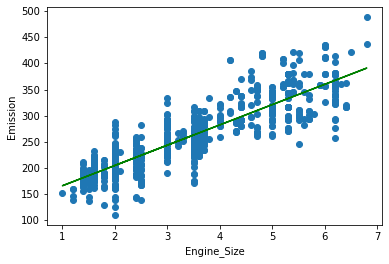

In [ ]:
#Plot the regression line with training data:

plt.scatter(train["ENGINESIZE"],train["CO2EMISSIONS"])
plt.plot(train["ENGINESIZE"],actual_slope*train["ENGINESIZE"]+actual_intercept,color="green")
plt.xlabel("Engine_Size")
plt.ylabel("Emission")
plt.show()

In [ ]:
#Define the prediction function:

def get_regression_prediction(input_features,slope,intercept):
    predicted_value = actual_slope*input_features + actual_intercept
    return predicted_value

In [ ]:
#Predicting values based on prediction function:

my_engine_size = 5

estimated_emission = get_regression_prediction(my_engine_size,actual_slope,actual_intercept)

print ("Estimated Emission: ",estimated_emission)

Estimated Emission:  321.1455186891026


In [ ]:
#Predicting values for the whole dataset:

y_pred = get_regression_prediction(data["ENGINESIZE"],actual_slope,actual_intercept)
print(y_pred)

0       204.760147
1       220.278197
2       185.362585
3       262.952833
4       262.952833
           ...    
1062    243.555271
1063    251.314296
1064    243.555271
1065    251.314296
1066    251.314296
Name: ENGINESIZE, Length: 1067, dtype: float64


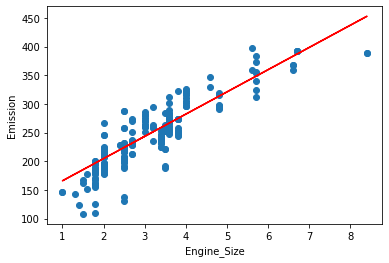

In [ ]:
#Plot the regression line for test data:

plt.scatter(test["ENGINESIZE"],test["CO2EMISSIONS"])
plt.plot(test["ENGINESIZE"],actual_slope*test["ENGINESIZE"]+actual_intercept,color="red")
plt.xlabel("Engine_Size")
plt.ylabel("Emission")
plt.show()

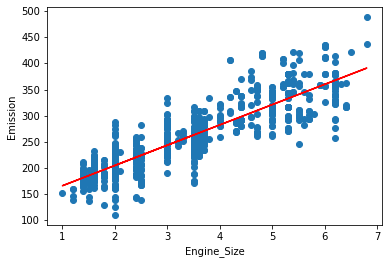

In [ ]:
#Plot the regression line for the training data:

plt.scatter(train["ENGINESIZE"],train["CO2EMISSIONS"])
plt.plot(train["ENGINESIZE"],actual_slope*train["ENGINESIZE"]+actual_intercept,color="red")
plt.xlabel("Engine_Size")
plt.ylabel("Emission")
plt.show()

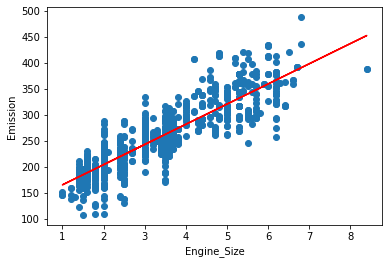

In [ ]:
#Plot the regression line for complete data:

plt.scatter(data["ENGINESIZE"],data["CO2EMISSIONS"])
plt.plot(data["ENGINESIZE"],actual_slope*data["ENGINESIZE"]+actual_intercept,color="red")
plt.xlabel("Engine_Size")
plt.ylabel("Emission")
plt.show()

In [ ]:
#Create a dataframe for Actual and Predicted values:

A_P_data = pd.DataFrame({"Actual":data["CO2EMISSIONS"] , "Predicted" :y_pred})
print(A_P_data.head())

   Actual   Predicted
0     196  204.760147
1     221  220.278197
2     136  185.362585
3     255  262.952833
4     244  262.952833


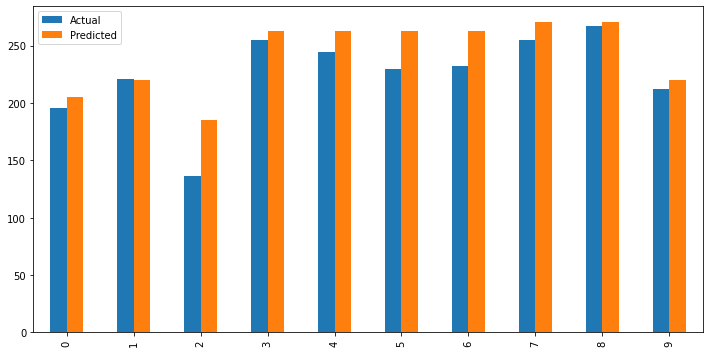

In [ ]:
#Plot the bar graph for actual and predicted values:

A_P_data.head(10).plot(kind='bar',figsize=(12,6))
plt.show()

In [ ]:
#Error calculation using Residual Sum of Squares:

def residual_sum_of_squares(input_feature,output,slope,intercept):
    prediction = slope*input_feature + intercept

    residual = (output - prediction)

    RSS = (residual*residual).sum()

    return(RSS)

In [ ]:
#Calculating error in prediction for our dataset:

print ("RSS : ",residual_sum_of_squares(test["ENGINESIZE"],test["CO2EMISSIONS"],actual_slope,actual_intercept))

RSS :  159741.10295932254


## Simple Linear Regression with Scikit-learn Implementation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
#Read csv file :

data = pd.read_csv("Fuel_Consumption.csv")
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
#Select only those features from our dataset which we are going to use for predictions:

data = data[["ENGINESIZE","CO2EMISSIONS"]]
print(data.head())

   ENGINESIZE  CO2EMISSIONS
0         2.0           196
1         2.4           221
2         1.5           136
3         3.5           255
4         3.5           244


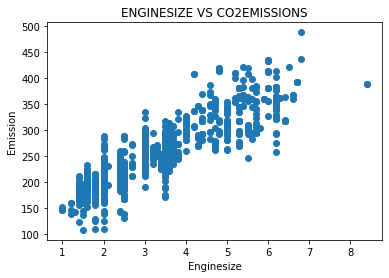

In [ ]:
#Scatter Plot:
#ENGINESIZE VS CO2EMISSIONS :

plt.scatter(data["ENGINESIZE"],data["CO2EMISSIONS"])
plt.title("ENGINESIZE VS CO2EMISSIONS")
plt.xlabel("Enginesize")
plt.ylabel("Emission")
plt.show()

In [ ]:
#Taking 80% of the data for training and 20% for testing:
num = int(len(data)*0.8)

#Training data:
train = data[:num]

#Testing data:
test = data[num:]

print ("Data: ",len(data))
print ("Train: ",len(train))
print ("Test: ",len(test))

Data:  1067
Train:  853
Test:  214


In [ ]:
#Training the model:

regr = linear_model.LinearRegression()

train_x = np.array(train[["ENGINESIZE"]])
train_y = np.array(train[["CO2EMISSIONS"]])

regr.fit(train_x,train_y)

coefficients = regr.coef_
intercept = regr.intercept_

#Slope:
print ("Slope: ",coefficients[0])

#Intercept:
print("Intercept: ",intercept)

Slope:  [38.79512384]
Intercept:  [127.16989951]


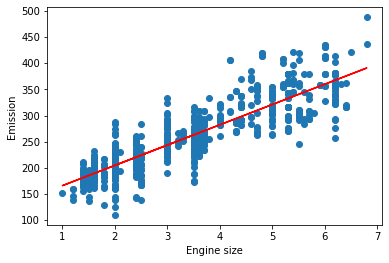

In [ ]:
#Plotting the regression line with train data:

plt.scatter(train["ENGINESIZE"], train["CO2EMISSIONS"])
plt.plot(train_x, coefficients[0]*train_x + intercept,color="red")
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [ ]:
regr.predict(data[["ENGINESIZE"]])

array([[204.76014718],
       [220.27819672],
       [185.36258526],
       ...,
       [243.55527102],
       [251.31429578],
       [251.31429578]])

In [ ]:
#Predicting values for the whole dataset:

predicted_data = regr.predict(data[["ENGINESIZE"]])
predicted_data[0:5]

array([[204.76014718],
       [220.27819672],
       [185.36258526],
       [262.95283294],
       [262.95283294]])

In [ ]:
predicted_train = regr.predict(train[["ENGINESIZE"]])
predicted_train[0:5]

array([[204.76014718],
       [220.27819672],
       [185.36258526],
       [262.95283294],
       [262.95283294]])

In [ ]:
predicted_test = regr.predict(test[["ENGINESIZE"]])
predicted_test[0:5]

array([[224.1577091 ],
       [262.95283294],
       [224.1577091 ],
       [224.1577091 ],
       [197.00112241]])

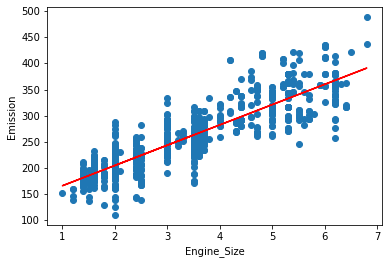

In [ ]:
#Plot the regression line for training data:

plt.scatter(train["ENGINESIZE"],train["CO2EMISSIONS"])
plt.plot(train["ENGINESIZE"],predicted_train,color="red")
plt.xlabel("Engine_Size")
plt.ylabel("Emission")
plt.show()

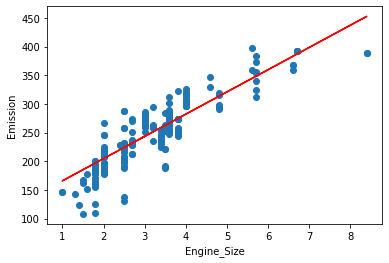

In [ ]:
#Plot the regression line for testing data:

plt.scatter(test["ENGINESIZE"],test["CO2EMISSIONS"])
plt.plot(test["ENGINESIZE"],predicted_test,color="red")
plt.xlabel("Engine_Size")
plt.ylabel("Emission")
plt.show()

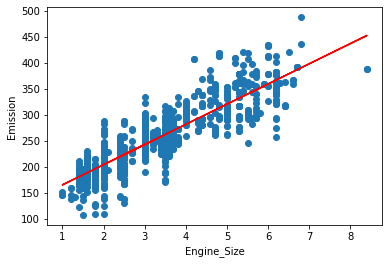

In [ ]:
#Plot the regression line for complete data:

plt.scatter(data["ENGINESIZE"],data["CO2EMISSIONS"])
plt.plot(data["ENGINESIZE"],predicted_data,color="red")
plt.xlabel("Engine_Size")
plt.ylabel("Emission")
plt.show()

In [ ]:
#Create a dataframe for Actual and Predicted values:

A_P_data = pd.DataFrame({"Actual":data["CO2EMISSIONS"],"Predicted":predicted_data[:][0][0]})
print(A_P_data.head())

   Actual   Predicted
0     196  204.760147
1     221  204.760147
2     136  204.760147
3     255  204.760147
4     244  204.760147


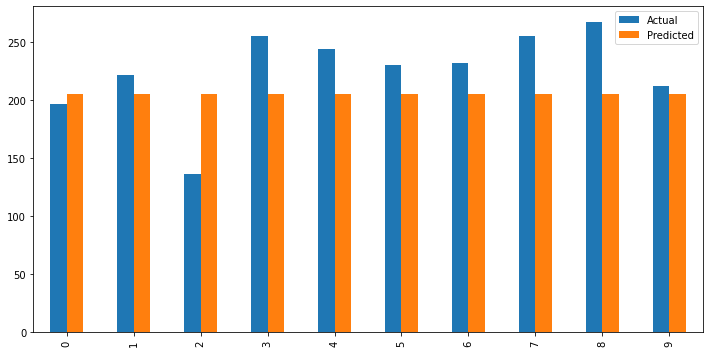

In [ ]:
#Plot the bar graph for actual and predicted values:

A_P_data.head(10).plot(kind='bar',figsize=(12,6))
plt.show()

In [ ]:
#Error calculations:

test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])

predicted_y= regr.predict(test_x)

res = (predicted_y - test_y)
RSS = (res*res).sum()

print("Residual Sum of Squares: ",RSS)

Residual Sum of Squares:  159741.10295932178
